In [65]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [141]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# dataframe de resposta para envio
answer = pd.DataFrame()

In [142]:

#número de inscrição
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
ans = answer['NU_INSCRICAO']

In [143]:

train.drop(['NU_INSCRICAO'], axis=1, inplace=True)
test.drop(['NU_INSCRICAO'],axis=1, inplace=True)

In [144]:
numeric_features = train.select_dtypes(include=[np.number])
corr = numeric_features.corr()
print (corr['IN_TREINEIRO'].sort_values(ascending=False)[:10], '\n')

IN_TREINEIRO       1.000000
TP_ST_CONCLUSAO    0.533983
TP_PRESENCA_CN     0.094692
TP_PRESENCA_CH     0.094692
TP_PRESENCA_LC     0.092454
TP_PRESENCA_MT     0.092454
Q034               0.055265
Q039               0.040348
Q005               0.033411
Q038               0.018855
Name: IN_TREINEIRO, dtype: float64 



In [145]:

train.shape, test.shape

((13730, 166), (4570, 42))

In [146]:

test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,43,RS,19,F,1,1,1,3,1,NaN,...,NaN,NaN,E,E,H,B,B,C,D,A
1,15,PA,24,M,3,2,1,4,1,NaN,...,NaN,NaN,B,C,B,A,A,C,D,A
2,29,BA,16,F,2,1,3,0,1,NaN,...,NaN,NaN,E,F,G,B,B,A,NaN,D
3,41,PR,17,F,1,1,2,0,2,1.0,...,40.0,480.0,E,E,E,C,B,B,C,A
4,53,DF,19,F,1,1,1,1,1,NaN,...,80.0,720.0,E,E,E,B,B,B,D,A


In [147]:
train = train[['NU_IDADE','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT', 'IN_TREINEIRO']]
test = test[['NU_IDADE','TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT']]

In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   NU_IDADE         13730 non-null  int64
 1   TP_ST_CONCLUSAO  13730 non-null  int64
 2   TP_PRESENCA_CN   13730 non-null  int64
 3   TP_PRESENCA_CH   13730 non-null  int64
 4   TP_PRESENCA_LC   13730 non-null  int64
 5   TP_PRESENCA_MT   13730 non-null  int64
 6   IN_TREINEIRO     13730 non-null  int64
dtypes: int64(7)
memory usage: 751.0 KB


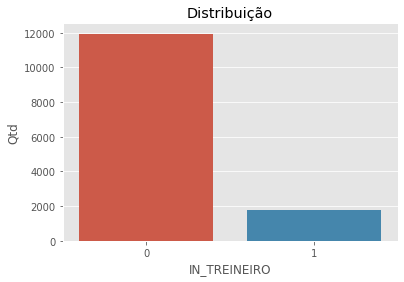

In [149]:
train['IN_TREINEIRO'].value_counts()
ax = sns.countplot(x='IN_TREINEIRO', data=train)
plt.ylabel('Qtd')
plt.title('Distribuição');

In [150]:
from imblearn.over_sampling import SMOTE


ModuleNotFoundError: No module named 'imblearn'

In [151]:
smt = SMOTE()
target = train['IN_TREINEIRO']
type(target)

NameError: name 'SMOTE' is not defined

In [152]:
train, target = smt.fit_sample(train, target)
np.bincount(target)
ax = sns.countplot(x=target)
plt.ylabel('Quantidade')
plt.title('Distribuição das classes');

NameError: name 'smt' is not defined

In [153]:

features = ['TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                 'TP_PRESENCA_MT']
features_corr = ['IN_TREINEIRO', 'TP_ST_CONCLUSAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
                 'TP_PRESENCA_MT']
df_train = train[features_corr]
df_test = test[features]

In [154]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   IN_TREINEIRO     13730 non-null  int64
 1   TP_ST_CONCLUSAO  13730 non-null  int64
 2   TP_PRESENCA_CN   13730 non-null  int64
 3   TP_PRESENCA_CH   13730 non-null  int64
 4   TP_PRESENCA_LC   13730 non-null  int64
 5   TP_PRESENCA_MT   13730 non-null  int64
dtypes: int64(6)
memory usage: 643.7 KB


In [155]:
y_train = df_train[['IN_TREINEIRO']]
df_train.drop('IN_TREINEIRO', axis=1, inplace=True)
x_train = df_train
x_test = df_test
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

C:\Users\barba\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [156]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [157]:
regressor.fit(x_train, y_train)

C:\Users\barba\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [158]:
x_test = df_test[features] 
x_test = sc.transform(x_test)

In [159]:

y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [160]:
y_pred_test

array([0., 0., 1., ..., 0., 0., 0.])

In [161]:
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 0.03812673
MSE: 0.03804982
RMSE: 0.19506363


In [162]:
y_pred_test

array([0., 0., 1., ..., 0., 0., 0.])

In [163]:
answer['NU_INSCRICAO'] = ans
answer['IN_TREINEIRO'] = y_pred_test.astype(int)

In [164]:
answer.sample(20)

,NU_INSCRICAO,IN_TREINEIRO
3662,7c88a99ad16edf632d300aa8ca5e981a793d19a9,0
1294,d2b72a5b0366616d82724c334dc9cf0cd376ad8f,0
2372,c4226c46f0ff1c6e1fc2054a66293712550a19b5,0
1886,98b01e07412f68a513847855ffbe69a328345aa5,0
2595,1e7f731753cc5cba9098f1d8ff36ef50279e64bf,0
3869,5e99a211f53abb58203fd88fea47b8ca11a1dd41,0
3045,724eaa2ea7d65c92e83d107b41eedd6ea17f3090,0
1343,8323585cb76407b1674f40270423e43a84b63aeb,0
4349,2eb73935022f75dab10c1a33e87c14d4fe367545,0
2808,be663c3b620925da19dbf4475672e5c1577a660d,0


In [165]:
answer.to_csv('answer.csv', index=False, header=True)
